In [1]:
import pandas as pd
import numpy as np 
# Read the first TSV file into a DataFrame
df1 = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')

# Read the second TSV file into another DataFrame
df2 = pd.read_csv('Project_data7.tsv', sep='\t')

# Concatenate the two DataFrames vertically (along rows)
merged_df = pd.concat([df1, df2], ignore_index=True)

# Save the merged DataFrame to a new TSV file
merged_df.to_csv('Project_data8.tsv', sep='\t', index=False)


In [2]:
tsv_file='Project_data8.tsv'
 
# reading given tsv file
csv_table=pd.read_table(tsv_file,sep='\t')
 
# converting tsv file into csv
csv_table.to_csv('Restaurant_Reviews2.csv',index=False)
 
# output
print("Successfully made csv file")

Successfully made csv file


In [3]:
df=csv_table
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
#Pandas.crosstab():frequency distribution
pd.crosstab(index=df['Liked'],columns='count',dropna=True) #dropna is deleting null values

col_0,count
Liked,
0,10299
1,8701


In [5]:
print(df.columns)
dataset=df

Index(['Review', 'Liked'], dtype='object')


<Axes: xlabel='Liked', ylabel='count'>

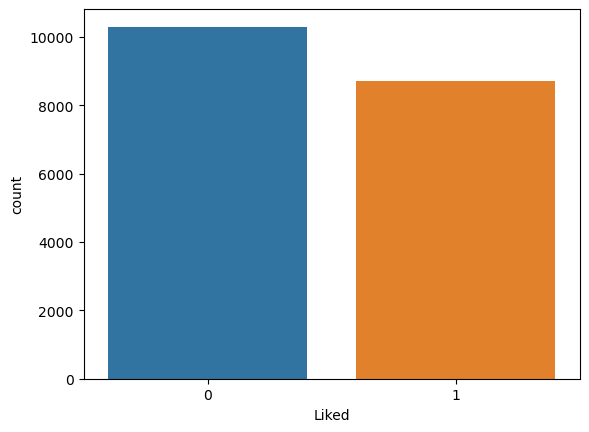

In [6]:
import seaborn as sns

#sns.countplot(k.Liked)
sns.countplot(x='Liked', data=dataset)

In [7]:
from nltk.stem import WordNetLemmatizer
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
lm = WordNetLemmatizer() #reducing words to their base or root form.
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

corpus = text_transformation(df['Review'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


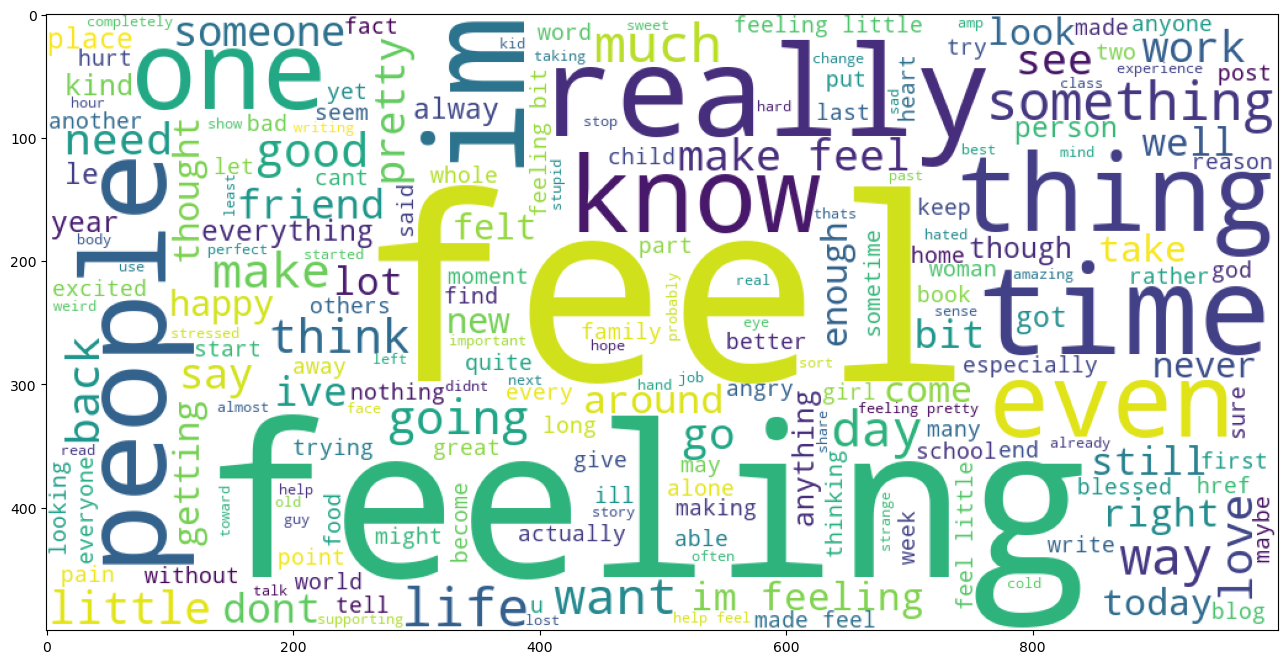

In [8]:
#Overall, these lines of code generate and display a word cloud visualization based on the input text (word_cloud). 
#The word cloud visually represents the frequency or importance of words in the input text.
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.rcParams['figure.figsize'] = 20,8 #20,8: This sets the width to 20 inches and the height to 8 inches for figures.
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [9]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 1500) 

# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray() 

# y contains answers if review
# is positive or negative
y = dataset.iloc[:, 1].values 


In [10]:
# Splitting the dataset into
# the Training set and Test set
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# experiment with "test_size"
# to get better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [11]:
# Fitting Random Forest Classification
# to the Training set
from sklearn.ensemble import RandomForestClassifier

# n_estimators can be said as number of
# trees, experiment with n_estimators
# to get better results 
model = RandomForestClassifier(n_estimators = 501,
							criterion = 'entropy')
							
model.fit(X_train, y_train) 
rfc=model

In [12]:
# Predicting the Test set results
y_pred = model.predict(X_test)

y_pred


array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [13]:
from sklearn.metrics import accuracy_score

# Assuming y_pred and y_test are NumPy arrays or lists
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.9212631578947369


In [14]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm


array([[2346,  256],
       [ 118, 2030]], dtype=int64)

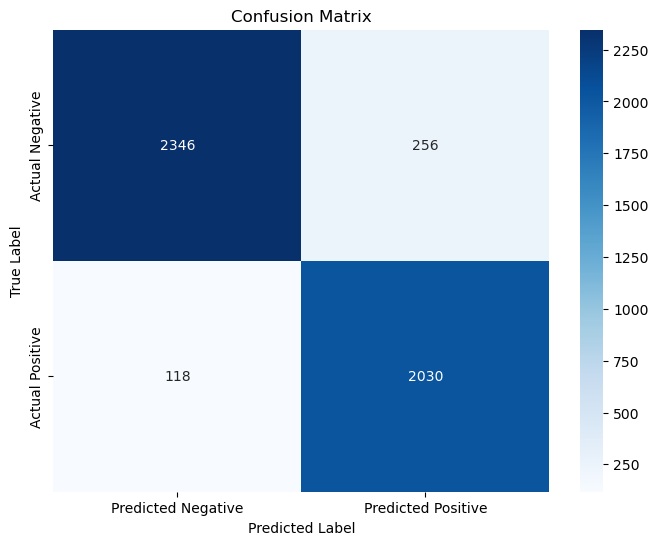

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you already have cm (confusion matrix) from your code
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


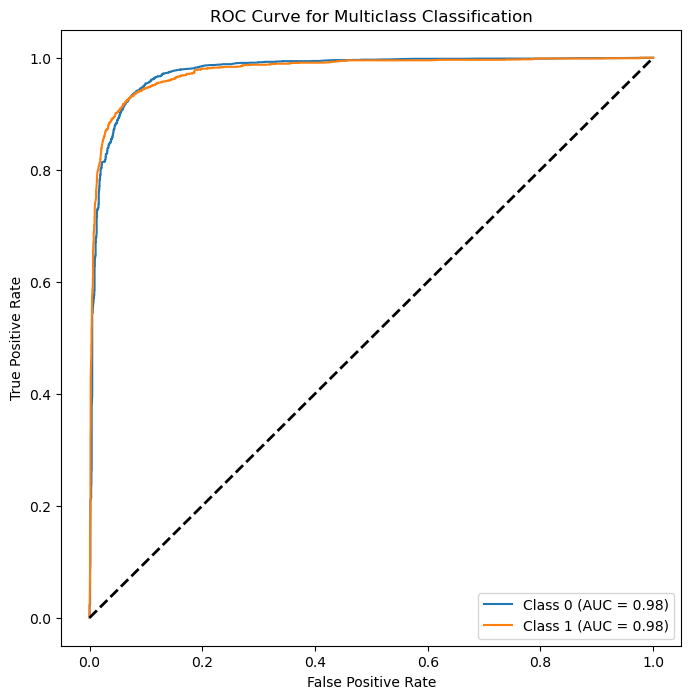

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have a trained model named 'model' and test data 'X_test'
# Use predict_proba to get class probabilities
predictions_probability = model.predict_proba(X_test)

# Assuming y_test and predictions_probability are for multiclass classification
n_classes = predictions_probability.shape[1]

# Plot ROC curve for each class
plt.figure(figsize=(8, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, predictions_probability[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()


In [17]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")

In [18]:
# function to take the input statement and perform the same transformations we did earlier
def sentiment_predictor(input):
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = rfc.predict(transformed_input)
    expression_check(prediction)

In [24]:
#input1 = ["Sometimes I just want to punch someone in the face."]
#input2 = ["I bought a new phone and it's so good."]
input1=[input()]
input2=[input()]

food is delicious
bad smell


In [25]:
sentiment_predictor(input1)
sentiment_predictor(input2)

Input statement has Positive Sentiment.
Input statement has Negative Sentiment.
